In [33]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import numpy as np

In [35]:
data = pd.read_csv('selected_data_is_spam.csv')

In [36]:
data.target = data.loc[:,'is_spam'].tolist() 


C:\Users\deniz\AppData\Local\Temp\ipykernel_23016\1918954315.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.target = data.loc[:,'is_spam'].tolist()


In [37]:
df = data
# Calculate the percentage of distinct values in a column
column_name = 'is_spam'
value_counts = df[column_name].value_counts()
percentages = value_counts * 100 / len(df)

# Print the result
print("Value counts and percentages in", column_name, "column:")
print(value_counts)
print(percentages)

Value counts and percentages in is_spam column:
is_spam
0    2788
1    1813
Name: count, dtype: int64
is_spam
0    60.595523
1    39.404477
Name: count, dtype: float64


In [38]:
data_x = data.drop("is_spam", axis = 1)

In [39]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data_x, data.target, test_size=0.3) # 70% training and 30% test

In [40]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the performance of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Accuracy: 0.9297610427226647
Precision: 0.928
Recall: 0.8838095238095238
F1-score: 0.9053658536585366


In [41]:
# Apply SMOTE to oversample the minority class
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Build the logistic regression model
model = LogisticRegression()
model.fit(X_train_resampled_scaled, y_train_resampled)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the performance of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Accuracy: 0.9290369297610427
Precision: 0.9113680154142582
Recall: 0.900952380952381
F1-score: 0.9061302681992337


In [42]:
from imblearn.under_sampling import TomekLinks

# Undersample the majority class using Tomek links
tl = TomekLinks()
X_resampled, y_resampled = tl.fit_resample(X_train_scaled, y_train)

# Build the logistic regression model on the resampled data
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the performance of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))


Accuracy: 0.9145546705286025
Precision: 0.9376344086021505
Recall: 0.8304761904761905
F1-score: 0.8808080808080808


In [43]:
from sklearn.model_selection import cross_val_score

# Apply SMOTE to oversample the minority class
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Build the logistic regression model on the resampled data
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

# Use cross-validation to evaluate the performance of the model
scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='f1')

# Calculate the mean and standard deviation of the F1 scores
mean_score = np.mean(scores)
std_score = np.std(scores)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the performance of the model on the test data
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Cross-validation F1-score mean:", mean_score)
print("Cross-validation F1-score standard deviation:", std_score)


Accuracy: 0.9217958001448225
Precision: 0.9371069182389937
Recall: 0.8514285714285714
F1-score: 0.8922155688622755
Cross-validation F1-score mean: 0.9280948693977307
Cross-validation F1-score standard deviation: 0.007797045650423987


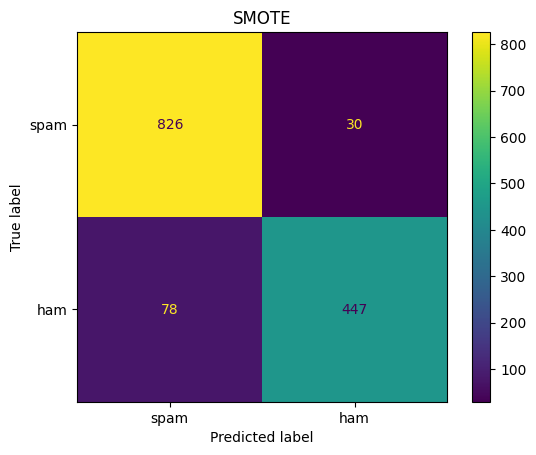

In [44]:
from sklearn import metrics
import matplotlib.pyplot as plt


cm = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels={'ham','spam'})
disp.plot()

plt.title("SMOTE")
plt.show()

In [45]:
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import cross_val_score

# Undersample the majority class using Tomek links
tl = TomekLinks()
X_resampled, y_resampled = tl.fit_resample(X_train_scaled, y_train)

# Build the logistic regression model on the resampled data
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

# Use cross-validation to evaluate the performance of the model
scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='f1')

# Calculate the mean and standard deviation of the F1 scores
mean_score = np.mean(scores)
std_score = np.std(scores)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the performance of the model on the test data
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Cross-validation F1-score mean:", mean_score)
print("Cross-validation F1-score standard deviation:", std_score)


Accuracy: 0.9145546705286025
Precision: 0.9376344086021505
Recall: 0.8304761904761905
F1-score: 0.8808080808080808
Cross-validation F1-score mean: 0.9047987570394227
Cross-validation F1-score standard deviation: 0.014371712415984682


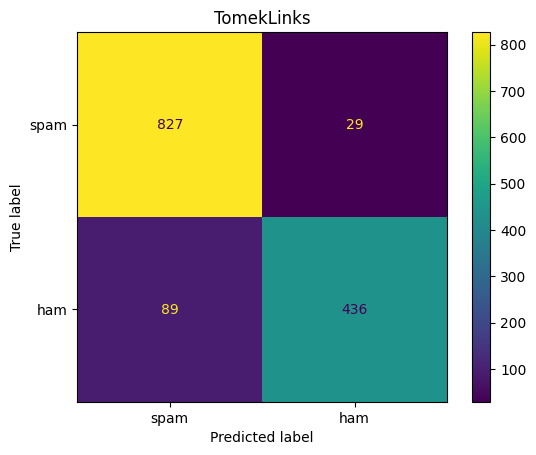

In [46]:
from sklearn import metrics
import matplotlib.pyplot as plt


cm = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels={'ham','spam'})
disp.plot()

plt.title("TomekLinks")

plt.show()

In [47]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet']
}

# Create the grid search object
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# Fit the grid search object to the data
grid.fit(X_train, y_train)

# Predict using the best estimator found by grid search
y_pred = grid.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

C:\Users\deniz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\deniz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Accuracy: 0.9232440260680667
Precision: 0.9067961165048544
Recall: 0.8895238095238095
F1-score: 0.898076923076923


C:\Users\deniz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
# Build the logistic regression model
model = LogisticRegression(solver = 'liblinear', max_iter = 10000)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Accuracy: 0.9319333816075308
Precision: 0.9217221135029354
Recall: 0.8971428571428571
F1-score: 0.9092664092664092


In [49]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the logistic regression model
model = LogisticRegression(random_state=8, max_iter=2000)
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the performance of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Accuracy: 0.9297610427226647
Precision: 0.928
Recall: 0.8838095238095238
F1-score: 0.9053658536585366


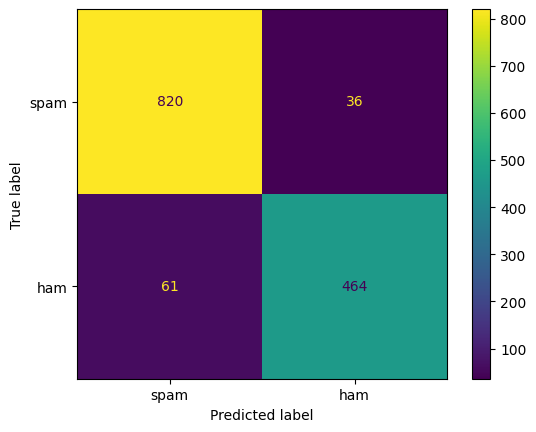

In [50]:
from sklearn import metrics
import matplotlib.pyplot as plt


cm = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels={'ham','spam'})
disp.plot()

plt.show()

In [51]:
from sklearn.preprocessing import PolynomialFeatures

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create polynomial features
degree = 2  # Degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


# Build the logistic regression model
model = LogisticRegression(random_state=8, max_iter=2000)
model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the performance of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Accuracy: 0.9232440260680667
Precision: 0.9132149901380671
Recall: 0.8819047619047619
F1-score: 0.8972868217054262


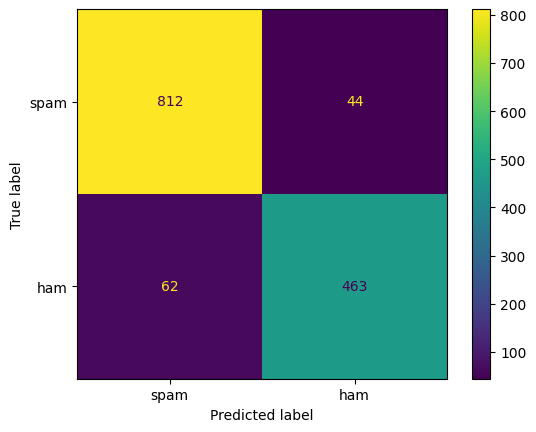

In [52]:
from sklearn import metrics
import matplotlib.pyplot as plt


cm = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels={'ham','spam'})
disp.plot()

plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create polynomial features
degree = 3  # Degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


# Build the logistic regression model
model = LogisticRegression(random_state=8, max_iter=2000)
model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the performance of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create polynomial features
degree = 4  # Degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


# Build the logistic regression model
model = LogisticRegression(random_state=8, max_iter=2000)
model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the performance of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))